# Problem Statement
### We want to classify the species of an Iris flower into wo classes: virginica and non-virginica

In [1]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Accessing the data
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species)

# Display some information about the dataset
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Number of features: 4


# Classify data into bianry, virginica or non virgnica

In [2]:
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Redefine target variable into binary classes: Virginica (1) and Non-Virginica (0)
y_binary = np.where(iris.target == 2, 1, 0)

# Display some information about the dataset
print("Original target names:", iris.target_names)
print("Redefine target names:", ['Non-Virginica', 'Virginica'])
print("Number of samples:", len(y_binary))


Original target names: ['setosa' 'versicolor' 'virginica']
Redefine target names: ['Non-Virginica', 'Virginica']
Number of samples: 150


# Perform Exploratory Data Analysis

C:\Users\emekamichael\AppData\Local\Temp\ipykernel_4020\3110460135.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Descriptive statistics for each class:
              sepal length (cm)                                              \
                          count   mean       std  min    25%  50%  75%  max   
Class                                                                         
Non-Virginica             100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0   
Virginica                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

              sepal width (cm)         ... petal length (cm)       \
                         count   mean  ...               75%  max   
Class                                  ...                          
Non-Virginica            100.0  3.099  ...             4.325  5.1   
Virginica                 50.0  2.974  ...             5.875  6.9   

              petal width (cm)                                            
                         count   mean       std  min  25%  50%  75%  max  
Class                                                                

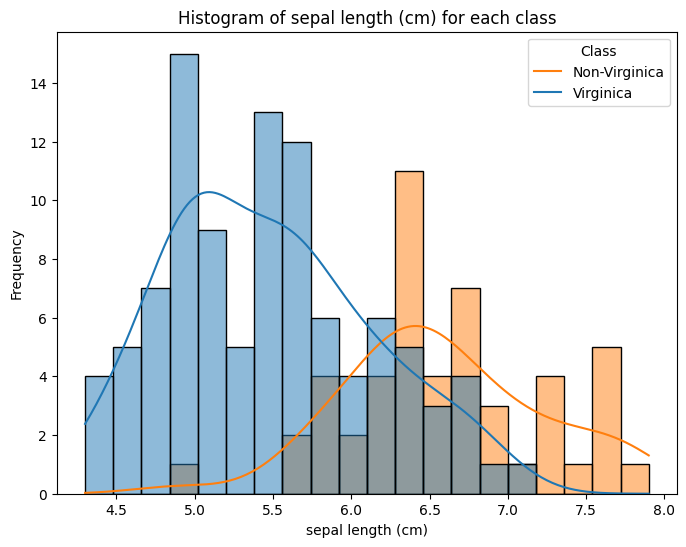

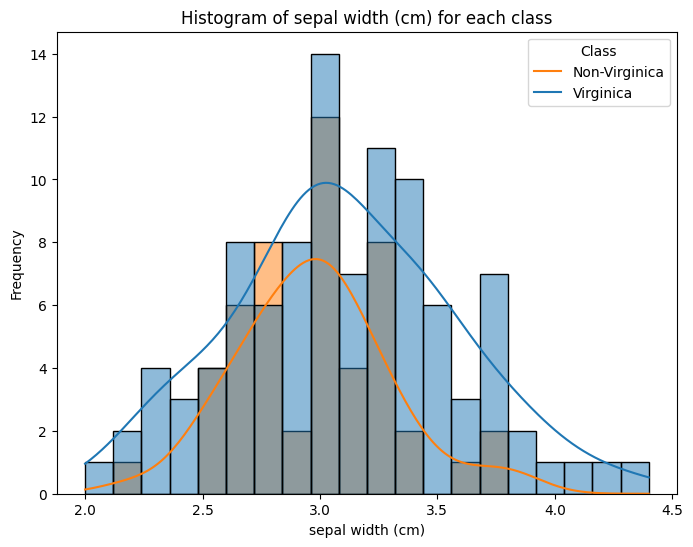

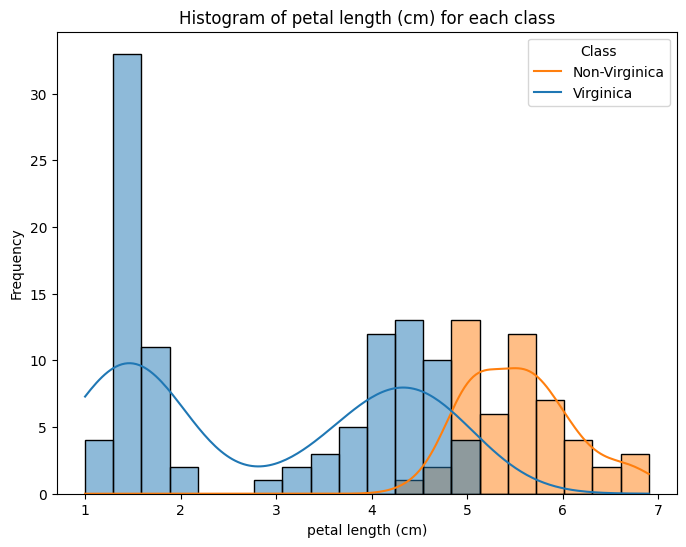

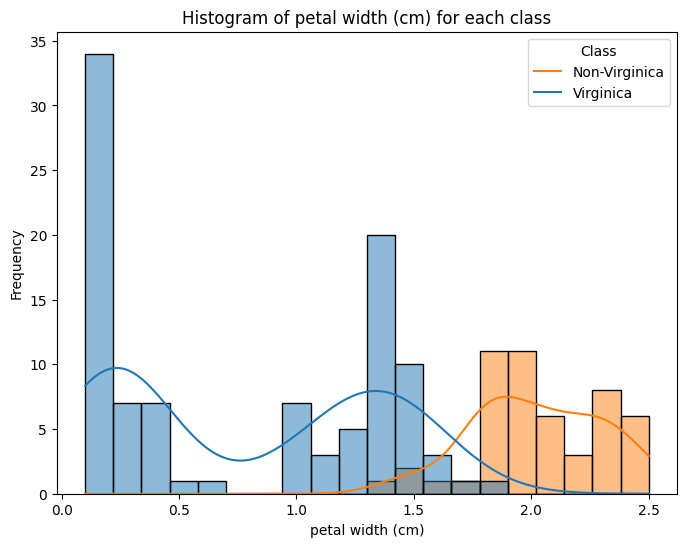

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Class'] = np.where(y_binary == 1, 'Virginica', 'Non-Virginica')

# Descriptive statistics for each class
descriptive_stats = iris_df.groupby('Class').describe()
print("Descriptive statistics for each class:")
print(descriptive_stats)

# Histogram per feature for each class
for feature in iris.feature_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=iris_df, x=feature, hue='Class', kde=True, bins=20)
    plt.title(f'Histogram of {feature} for each class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Class', labels=['Non-Virginica', 'Virginica'])
    plt.show()


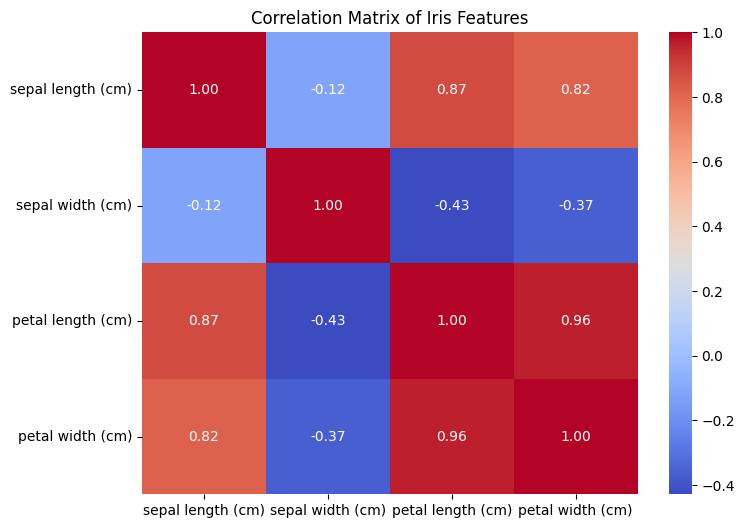

In [4]:
# Compute correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()


# Split dataset 

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (120 records for training, 30 records for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=30, random_state=42)

# Split the testing set into validation and final testing sets (15 records each)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=15, random_state=42)

# Display the sizes of each set
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 120
Validation set size: 15
Test set size: 15


# raining the model

In [6]:
from sklearn.linear_model import LogisticRegression
from itertools import combinations

# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Features
features = iris.data
num_features = features.shape[1]

# Randomly select feature combinations
feature_combinations = []
for i in range(1, num_features + 1):
    feature_combinations.extend(combinations(range(num_features), i))

import random

random.shuffle(feature_combinations)

# Train logistic regression models with different feature combinations
for feature_set in feature_combinations[:4]:  # Select first 4 combinations randomly
    selected_features = features[:, feature_set]
    log_reg.fit(selected_features, y_binary)
    print("Features:", feature_set)
    print("Model Coefficients:", log_reg.coef_)
    print("Model Intercept:", log_reg.intercept_)
    print("")



Features: (0, 1)
Model Coefficients: [[ 2.22195969 -0.51274517]]
Model Intercept: [-12.52959903]

Features: (0, 3)
Model Coefficients: [[0.7450106  3.98432079]]
Model Intercept: [-11.28216296]

Features: (0,)
Model Coefficients: [[2.22983592]]
Model Intercept: [-14.1006973]

Features: (2, 3)
Model Coefficients: [[2.77983942 2.38388751]]
Model Intercept: [-17.55616979]



# Evaluate and check performanec 

In [7]:
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.metrics import accuracy_score

# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Randomly select feature combinations
feature_combinations = []
for i in range(1, num_features + 1):
    feature_combinations.extend(combinations(range(num_features), i))

import random

random.shuffle(feature_combinations)

# Evaluate each model on the validation set
for idx, feature_set in enumerate(feature_combinations[:4]):
    selected_features_train = X_train[:, feature_set]
    selected_features_val = X_val[:, feature_set]
    
    # Train logistic regression model
    log_reg.fit(selected_features_train, y_train)
    
    # Predictions on validation set
    predictions = log_reg.predict(selected_features_val)
    probabilities = log_reg.predict_proba(selected_features_val)[:, 1]
    
    print(f"Model {idx+1} - Features: {feature_set}")
    print("{:<15} {:<25} {:<20} {:<15}".format('Instance', 'Predicted Probability', 'Prediction', 'Ground Truth'))
    print("-" * 75)
    for i in range(len(predictions)):
        print("{:<15} {:<25.3f} {:<20} {:<15}".format(i+1, probabilities[i], predictions[i], y_val[i]))
    print("\n")
    
    # Calculate accuracy for each model
    accuracy = accuracy_score(y_val, predictions)
    print(f"Model {idx+1} - Features: {feature_set} - Accuracy: {accuracy:.2f}")


Model 1 - Features: (0, 3)
Instance        Predicted Probability     Prediction           Ground Truth   
---------------------------------------------------------------------------
1               0.005                     0                    0              
2               0.005                     0                    0              
3               0.965                     1                    1              
4               0.933                     1                    1              
5               0.325                     0                    0              
6               0.603                     1                    1              
7               0.697                     1                    1              
8               0.160                     0                    0              
9               0.002                     0                    0              
10              0.002                     0                    0              
11              0.941       

# Visualize
# Kindly note that i am having a challenge with plotly. cant seem to wo work appropraitely up till now despite all that i tried. That is is why iam using another package( though less effective) for visualization

Model 1 - Features: (0, 3) - Accuracy: 1.00
Model 2 - Features: (1, 2) - Accuracy: 1.00
Model 3 - Features: (0,) - Accuracy: 0.93


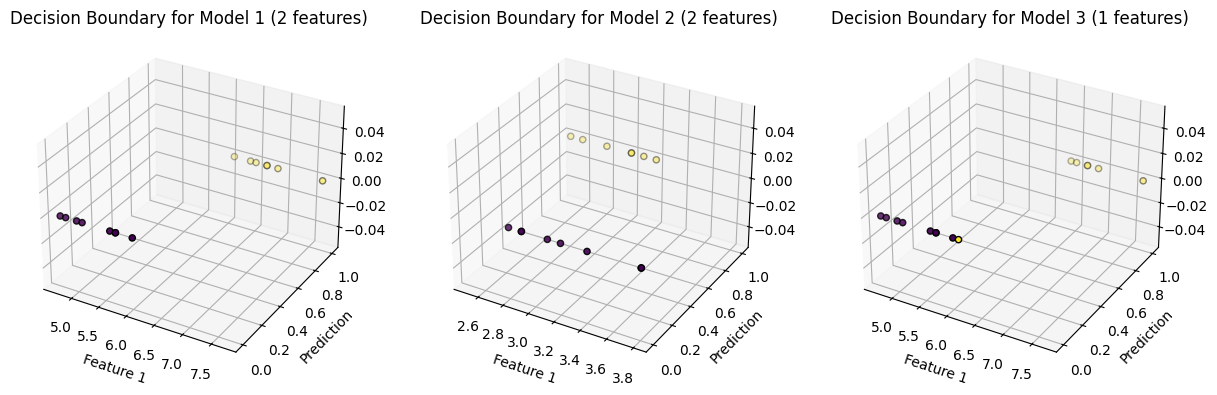

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train models and plot decision boundaries
fig = plt.figure(figsize=(15, 5))

for idx, feature_set in enumerate(feature_combinations[:3]):  # Select first 3 combinations randomly
    selected_features_train = X_train[:, feature_set]
    selected_features_val = X_val[:, feature_set]
    
    # Train logistic regression model
    log_reg.fit(selected_features_train, y_train)
    
    # Predictions on validation set
    predictions = log_reg.predict(selected_features_val)
    
    # Calculate accuracy for each model
    accuracy = accuracy_score(y_val, predictions)
    print(f"Model {idx+1} - Features: {feature_set} - Accuracy: {accuracy:.2f}")
    
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    
    if len(feature_set) < 3:
        ax.scatter(selected_features_val[:, 0], predictions, c=y_val, cmap='viridis', edgecolors='k')
        ax.set_title(f"Decision Boundary for Model {idx+1} ({len(feature_set)} features)")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Prediction')
    else:
        # Plot decision boundary for 3D data
        x_min, x_max = selected_features_val[:, 0].min() - 1, selected_features_val[:, 0].max() + 1
        y_min, y_max = selected_features_val[:, 1].min() - 1, selected_features_val[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
        Z = Z.reshape(xx.shape)
        ax.plot_surface(xx, yy, Z, alpha=0.6, cmap='viridis')
        ax.scatter(selected_features_val[:, 0], selected_features_val[:, 1], predictions, c=y_val, cmap='viridis', edgecolors='k')
        ax.set_title(f"Decision Boundary for Model {idx+1} (3 features)")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Prediction')

plt.show()


### based on the Accuracy of the models, model 1 with 3 faetures and model model 2 with 2 features perfomed well. Any of them will be fine.